# Empirical Temporal Networks

In [2]:
from SubTempNet import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Primaryschool

## Original

In [3]:
filename = "data/primaryschool.edges"
objname= "primaryschool"
STN = SubTempNet(filename, objname, directed= False, init = False)

[1, 8, 9, 10, 12, 13, 15, 18, 20, 23, 27, 31, 35, 40, 46, 53, 60, 69, 79, 90, 103, 118, 135, 155, 177, 203, 232, 266, 304, 348, 398, 455, 521, 595, 681, 779, 891, 1019, 1166, 1334, 1525, 1745, 1996, 2283, 2611, 2986, 3416, 3907, 4468, 5111, 5846]


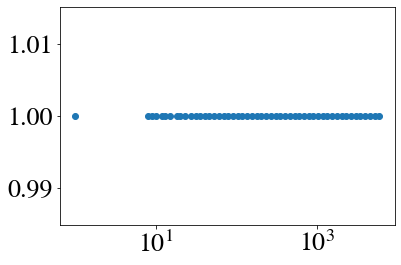

In [9]:
num = 50
T = sorted([1]+list(set(np.logspace(np.log10(STN["T"]),np.log10(8.1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [ ]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [1, 8, 9, 10, 12, 13, 15, 18, 20, 23]
Analyzing sample number 2 for samplelength  27 and  8 slices


In [ ]:
STN.save()

In [ ]:
STN.plot_PA(normalize=True, LCC = False)
STN.plot_LCC(normalize=True, ACC = False)
STN.plot_cA0AT()
STN.plot_cA0AL(2,4,6,8)

## EDS

In [8]:
#Create EDS Temporal network
name = "data/"+ STN["objname"][:-11]+"_EDS.edges"
deg = STN["deg_seq"]/STN["T"]
A = []
for t in range(int(1.5*STN["T"])):
    A.append(STN.ChungLu(deg))
#check that first and last snapshot contain at least one edge
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(n),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(n),2,replace = False )
    A[-1].add_edge(u,v)
#save edgelist
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [ ]:
filename = "data/primaryschool_EDS.edges"
objname= "primaryschool_EDS"
STN = SubTempNet(filename, objname, directed= False, init = False)